Contents
1. Figure 3 in MR-APSS paper: evaluation of the type I error control of MR methods using negative control outcomes;
2. Figure 5-B, 5-C: type I error control of MR-APSS under different IV selection thresholds.

In [68]:
options(warn = -1)
## load packages
library(ggplot2)
library(gridExtra)
library(ggpubr)
library(grid)
library(latex2exp)
library(ggsci)

## Load QQ-plots functions
source('qqplot_funcs.R')

## prepare colors                    
npg <- pal_npg("nrc", alpha = 1)(10)
nejm <- pal_nejm("default", alpha = 1)(8)
uchi <- pal_uchicago("default", alpha = 1)(6)


## Traits infomation
# Traits (file names)
exps = c("T2D", "Urate", "HBP", "Angina", "CAD", "BMI", "Height_GIANT", "Height_UKB", "RA", "IBD", "CD",
         "ASD", "Anorexia", "Smoking", "Alcohol", "Daytime_Sleepiness", "Insomnia", "MDD", "SCZ", "AD",
         "Depression", "Neuroticism", "SWB", "NEB", "Income", "Intelligence")

outs =  c("Hair_Light_Brown", "Hair_Dark_Brown","Hair_Black", "Hair_Blonde",  "Tanning")

# Traits (names show in figures)
Name.exps = c("T2D", "Urate", "HBP", "Angina", "CAD", "BMI", "Height (GIANT)", "Height (UKBB)", "RA", "IBD", "CD",
              "ASD", "Anorexia", "Smoking", "Alcohol", "Daytime sleepiness", "Insomnia", "MDD", "SCZ", "AD", 
              "Depression", "Neuroticism", "SWB", "NEB", "Income", "Intelligence")

Name.outs =  c("Hair: light brown", "Hair: dark brown","Hair: black", "Hair: blonde",  "Tanning")

# Traits (group infomation)
TraitsInfo = read.csv("GWAS_26and5_source.csv", header = T)
TraitsInfo = TraitsInfo[, c("Filename","Trait","Group")]
TraitsInfo$Group = factor(as.character(TraitsInfo$Group), 
                          levels =c("Negative control outcome", "Cardiometabolic", "Anthropometric", 
                                    "Immune", "Neurological/Psychiatric", "Social"))

TraitsInfo.exps =  subset(TraitsInfo, Group != "Negative control outcome")
colnames(TraitsInfo.exps) = c("exposure","Name.exp","Group.exp")
TraitsInfo.exps = TraitsInfo.exps[match(exps, TraitsInfo.exps$exposure), ]

TraitsInfo.outs =  subset(TraitsInfo, Group == "Negative control outcome")
colnames(TraitsInfo.outs) = c("outcome","Name.out","Group.out")
TraitsInfo.outs = TraitsInfo.outs[match(outs, TraitsInfo.outs$outcome), ]

## Reading in results of MR methods 
ldsc_res =read.table("pairs_ldsc_res", header=T)
ldsc_res = ldsc_res[, c("exposure","outcome","rg","rg.se","C1","C2","C12","C12.se")]
ldsc_res$rg.pval = pchisq(ldsc_res$rg^2/ldsc_res$rg.se^2, 1, lower.tail = F)
ldsc_res$C12.pval = pchisq(ldsc_res$C12^2/ldsc_res$C12.se^2, 1, lower.tail = F)

apss_res = read.table("NC_MRAPSS.MRres", header = T)
apss_res = apss_res[, c("exposure","outcome","Method", "Threshold", "nsnp","beta.hat","se","pval")]
                   
MRmethods_res = read.table("NC_8methods.MRres", header = T)

cause_res = read.table("NC_CAUSE.MRres", header=T)

res1 = subset(apss_res, Threshold==5e-05 & Method != "MR-APSS(Cor.SelectionBia=F)")
res1.group = na.omit(reshape2::dcast(unique(res1), exposure + outcome ~ Method, value.var = "pval", drop = T))                     
res1.group = merge(res1.group, ldsc_res, by=c("exposure","outcome"))

res2 = rbind(subset(apss_res, Method=="MR-APSS" & Threshold==5e-05),
             MRmethods_res, 
             cause_res)
res2.group = na.omit(reshape2::dcast(unique(res2), exposure + outcome ~ Method, value.var = "pval", drop = T))
res2.group = merge(res2.group, ldsc_res, by = c("exposure","outcome"))                      

npairs = nrow(res2.group)

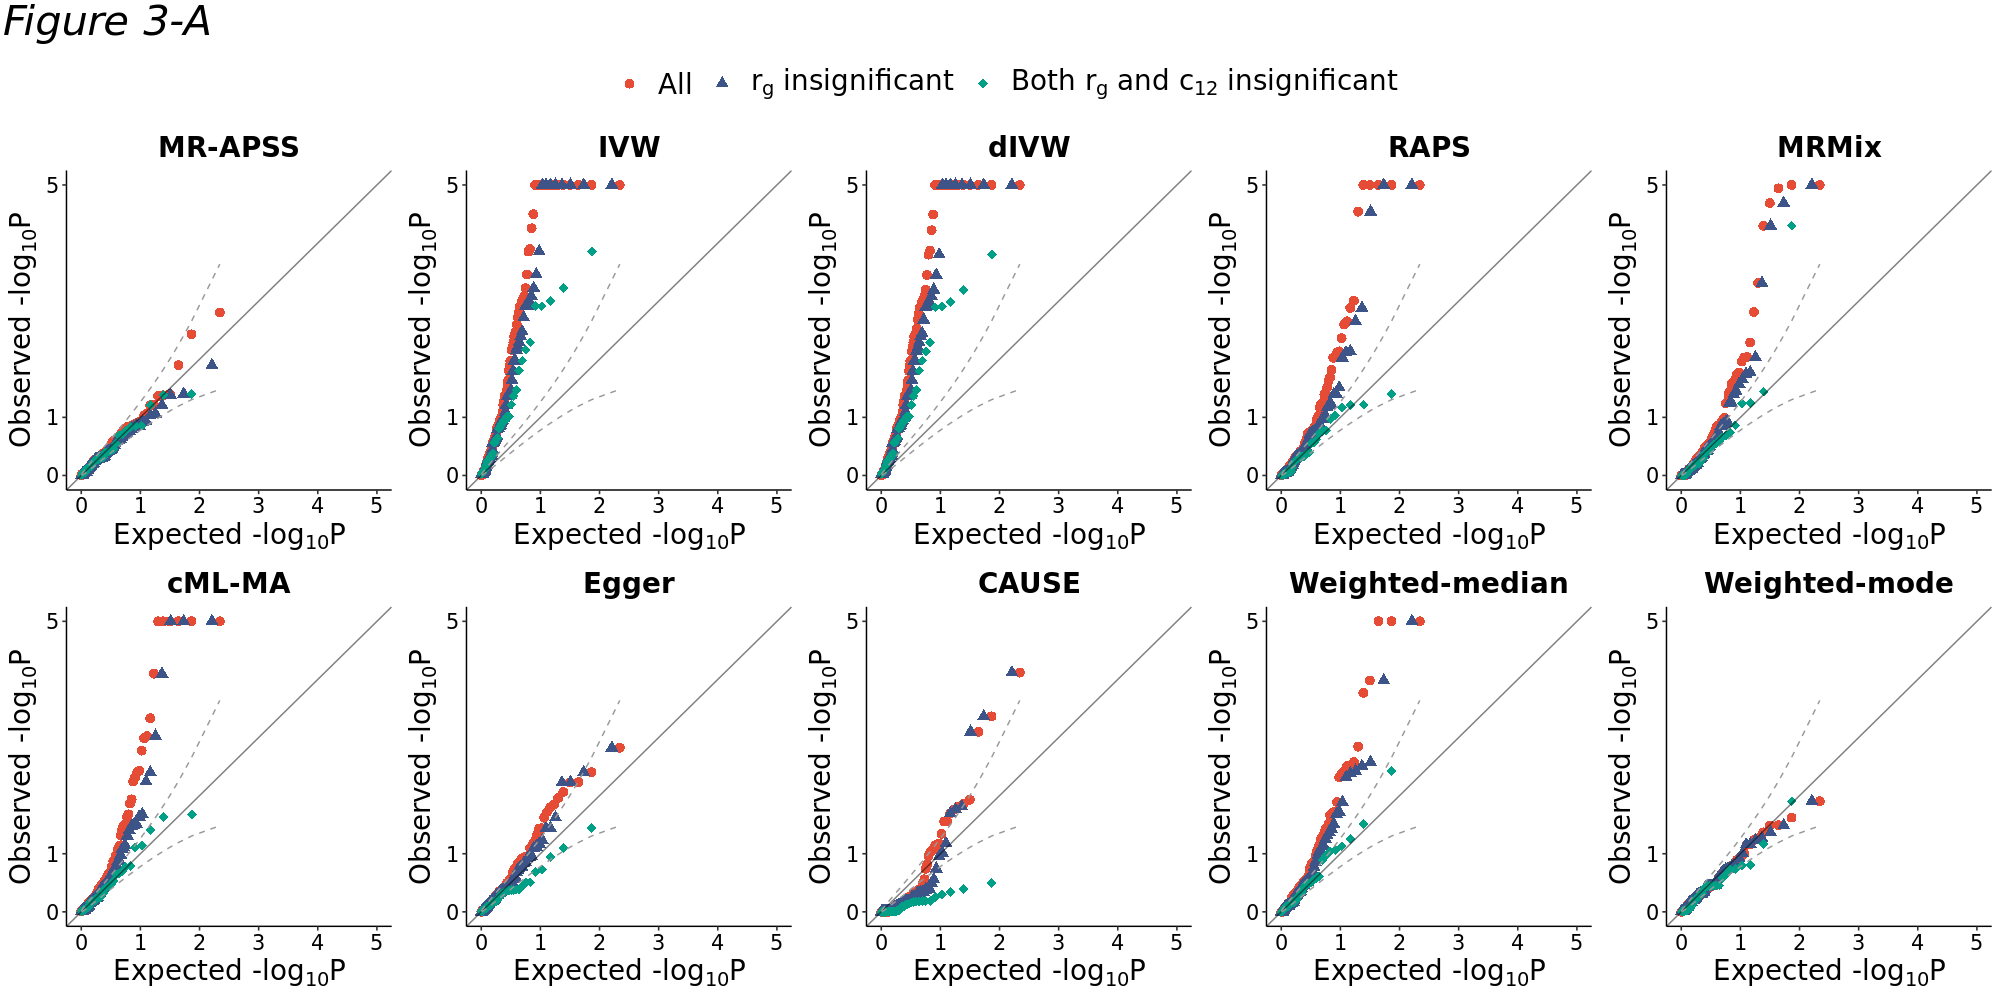

In [69]:
# Figure 3-A
qq_IVW = qqplot3_sep(res2.group$IVW,
                     subset(res2.group, rg.pval > 0.05)$IVW,
                     subset(res2.group, rg.pval > 0.05 & C12.pval > 0.05)$IVW)

qq_dIVW = qqplot3_sep(res2.group$dIVW,
                      subset(res2.group, rg.pval > 0.05)$dIVW,
                      subset(res2.group, rg.pval > 0.05 & C12.pval > 0.05)$dIVW)

qq_cML = qqplot3_sep(res2.group$`cML-MA`,
                     subset(res2.group, rg.pval > 0.05)$`cML-MA`,
                     subset(res2.group, rg.pval > 0.05 & C12.pval > 0.05)$`cML-MA`)


qq_RAPS = qqplot3_sep(res2.group$RAPS,
                      subset(res2.group, rg.pval > 0.05)$RAPS,
                      subset(res2.group, rg.pval > 0.05 & C12.pval > 0.05)$RAPS)

qq_CAUSE = qqplot3_sep(res2.group$CAUSE,
                       subset(res2.group, rg.pval > 0.05)$CAUSE,
                       subset(res2.group, rg.pval > 0.05& C12.pval > 0.05)$CAUSE)

qq_Egger = qqplot3_sep(res2.group$Egger,
                       subset(res2.group, rg.pval > 0.05)$Egger,
                       subset(res2.group, rg.pval > 0.05& C12.pval > 0.05)$Egger)

qq_APSS = qqplot3_sep(res2.group$`MR-APSS`,
                      subset(res2.group, rg.pval > 0.05)$`MR-APSS`,
                      subset(res2.group, rg.pval > 0.05& C12.pval > 0.05)$`MR-APSS`)

qq_Mix = qqplot3_sep(res2.group$MRMix,
                     subset(res2.group, rg.pval > 0.05)$MRMix,
                     subset(res2.group, rg.pval > 0.05& C12.pval > 0.05)$MRMix)

qq_median = qqplot3_sep(res2.group$`Weighted-median`,
                        subset(res2.group, rg.pval > 0.05)$`Weighted-median`,
                        subset(res2.group, rg.pval > 0.05& C12.pval > 0.05)$`Weighted-median`)

qq_mode = qqplot3_sep(res2.group$`Weighted-mode`,
                      subset(res2.group, rg.pval > 0.05)$`Weighted-mode`,
                      subset(res2.group, rg.pval > 0.05& C12.pval > 0.05)$`Weighted-mode`)

g_legend<-function(a.gplot){
  tmp <- ggplot_gtable(ggplot_build(a.gplot))
  leg <- which(sapply(tmp$grobs, function(x) x$name) == "guide-box")
  legend <- tmp$grobs[[leg]]
  return(legend)}
legend_p =  g_legend(qq_IVW)


options(repr.plot.width = 20, repr.plot.height = 10, repr.plot.res = 100)                      
grid.arrange(legend_p,
             qq_APSS + ggtitle("MR-APSS") + theme(legend.position = "none"),
             qq_IVW + ggtitle("IVW") + theme(legend.position = "none"),
             qq_dIVW + ggtitle("dIVW") + theme(legend.position = "none"),
             qq_RAPS + ggtitle("RAPS")+ theme(legend.position = "none"),
             qq_Mix + ggtitle("MRMix") + theme(legend.position = "none"),
             qq_cML + ggtitle("cML-MA") + theme(legend.position = "none"),
             qq_Egger + ggtitle("Egger") + theme(legend.position = "none"),
             qq_CAUSE + ggtitle("CAUSE") + theme(legend.position = "none"),
             qq_median + ggtitle("Weighted-median") + theme(legend.position = "none"),
             qq_mode + ggtitle("Weighted-mode") + theme(legend.position = "none"),
             layout_matrix = matrix(c(1, 1, 1,1,1, 2:11),ncol = 5, byrow = T),
             widths = c(1,1,1,1,1),
             heights = c(0.2,1,1),
             top = textGrob("Figure 3-A", gp=gpar(fontsize=30, font=3), x = 0, hjust = 0))


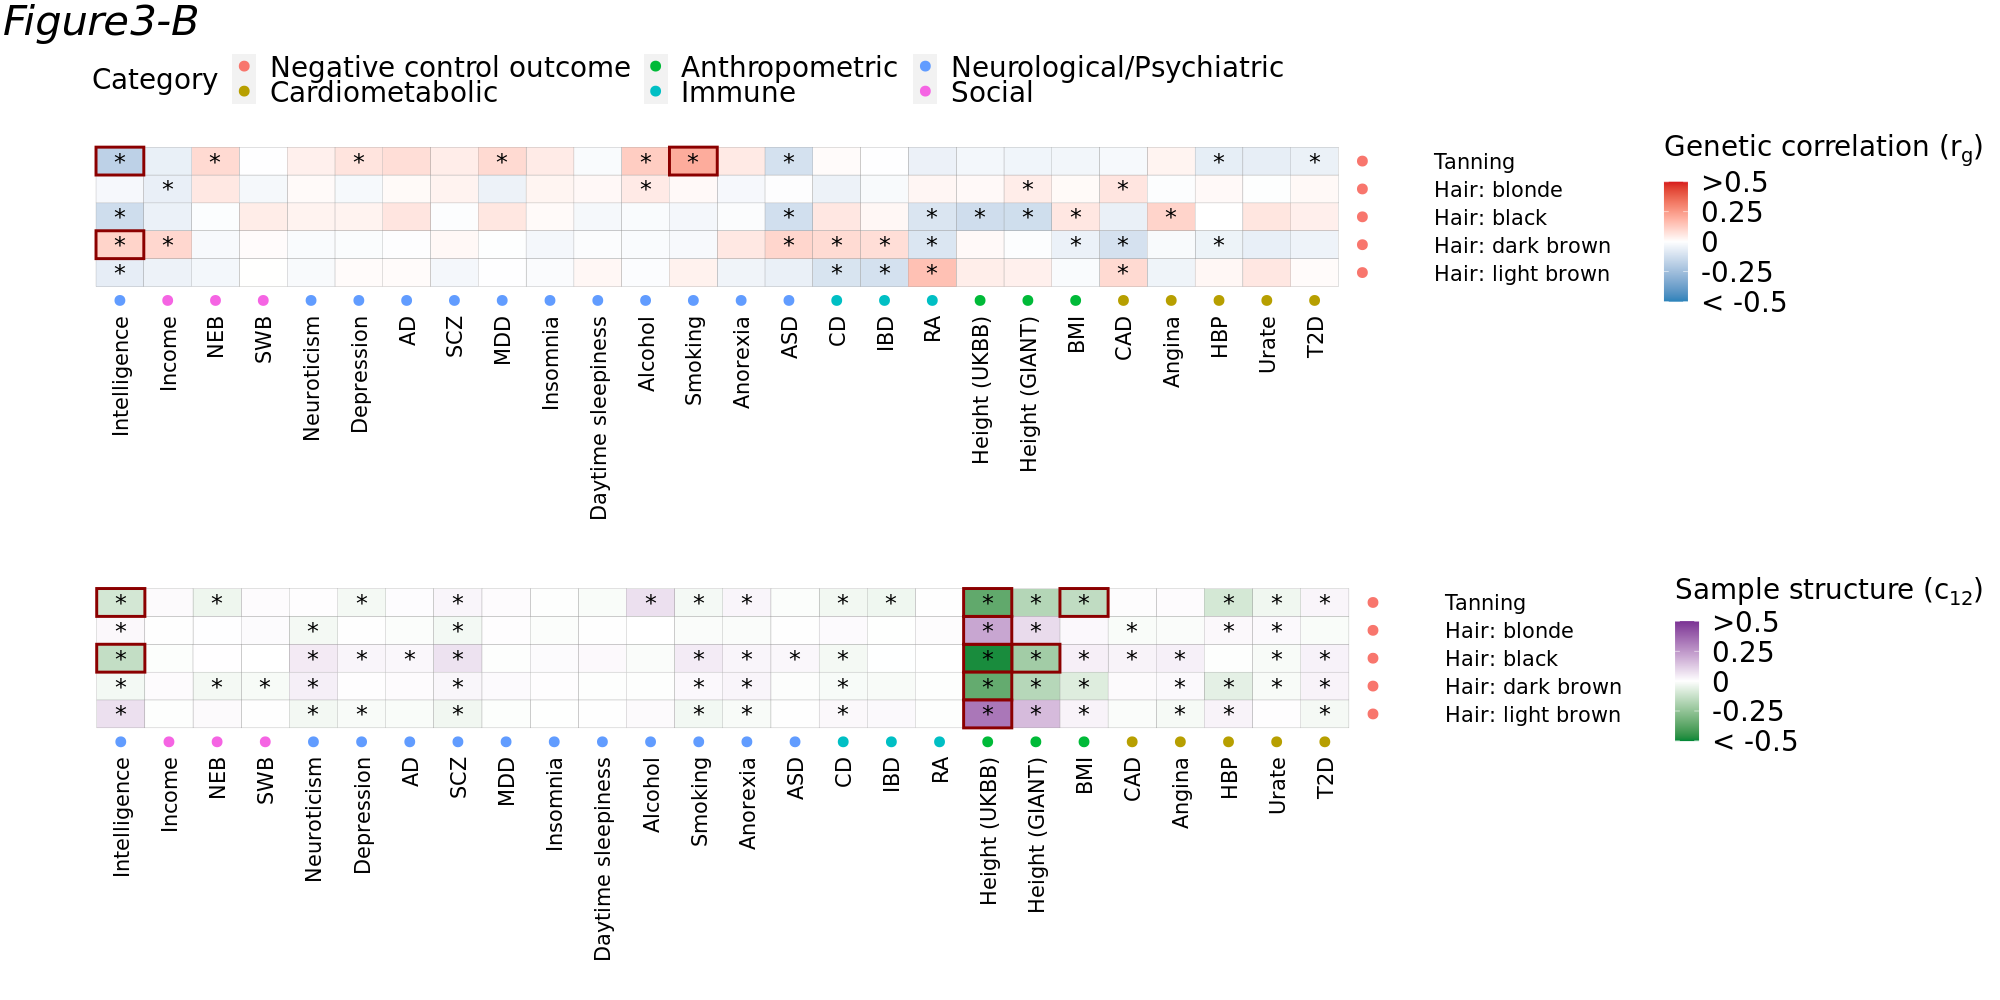

In [70]:
# Figure3-B
nexp = 26
nout = 5

dat1 = merge(res1.group, TraitsInfo.exps, by=c("exposure"))
dat1 = merge(dat1, TraitsInfo.outs, by=c("outcome"))
dat1$Name.exp = as.numeric(factor(as.character(dat1$Name.exp), levels = Name.exps))
dat1$Name.out = as.numeric(factor(as.character(dat1$Name.out), levels = Name.outs))

ts.group = rbind(data.frame(Name.exp = 1:nexp,
                            Name.out = 0,
                            Group = TraitsInfo.exps$Group.exp),
                 data.frame(Name.exp = 0,
                            Name.out = 1:nout ,
                            Group = "Negative control outcome"))

ts.group$Group = factor(as.character(ts.group$Group), 
                        levels =c("Negative control outcome",
                                  "Cardiometabolic",
                                  "Anthropometric", 
                                  "Immune",               
                                  "Neurological/Psychiatric",
                                  "Social"))

plot.rg.rotate = ggplot(dat1) +
  geom_tile(aes(x = Name.out, y=Name.exp, fill = rg), color = "gray60") +
  geom_tile(data = subset(dat1, `MR-APSS(Omega=0)`<0.05/npairs)[1,],  
            aes(x = Name.out, y=Name.exp, fill = rg), color = 'darkred', size = 1) +
  geom_tile(data = subset(dat1, `MR-APSS(Omega=0)`<0.05/npairs)[2,],  
            aes(x = Name.out, y=Name.exp, fill = rg), color = 'darkred', size = 1) +
  geom_tile(data = subset(dat1, `MR-APSS(Omega=0)`<0.05/npairs)[3,],  
            aes(x = Name.out, y=Name.exp, fill = rg), color = 'darkred', size = 1) +
  scale_fill_gradient2(low = "#2b83ba", high = "#d7191c", mid = "white", 
                       midpoint = 0, limit = c(-0.5, 0.5),
                       breaks = c(0.5, 0.25, 0, -0.25, -0.5),
                       labels = c(">0.5", "0.25", "0", "-0.25", "< -0.5"),
                       space = "Lab", 
                       name= TeX("Genetic correlation ($r_g$)")) +
  geom_text(data = subset(dat1, rg.pval < 0.05), aes(x = Name.out, y=Name.exp), label = "*", size = 6, color = "black") +
  geom_point(dat = ts.group, aes(x = Name.out, y=Name.exp, color = Group), size=3) +
  scale_y_reverse(limits = c((nexp+1),0), breaks = nexp:1,labels = rev(Name.exps)) +
  scale_x_continuous(limits = c(0,nout+1),breaks = 1:nout,labels = Name.outs, position = "top") +
  #guides(color=guide_legend("Category"))+
  labs(y="", x="") +
   guides( color = FALSE) +
  theme(axis.text.x = element_text(angle = 90, 
                                   size = 15, hjust = 1, vjust=0.5, color = "black"),
        axis.text.x.top = element_text(size = 15,vjust = 0, color = "black"),
        axis.text.y.right = element_text(size = 15,vjust = 0.5,hjust = 0, color = "black"),
        axis.text.y = element_text(size = 15, hjust=0,vjust=0, color = "black"),
        axis.ticks = element_blank(),
        axis.title = element_text(size = 20),
        legend.text = element_text(size = 20),
        legend.title = element_text(size = 20),
        plot.title = element_text(hjust=0, size = 25, face = "bold"),
        panel.background=element_blank()) +
  #coord_fixed(ylim = c(nexp+1,1), xlim= c(0, nout+1), ratio=1) +
  coord_flip()

plot.C12.rotate = ggplot(dat1) +
  geom_tile(aes(x = Name.out, y=Name.exp, fill = C12), color = "gray60") +
  geom_tile(data = subset(dat1, `MR-APSS(C=I)`<0.05/npairs),  
            aes(x = Name.out, y=Name.exp, fill = C12), color = 'darkred', size = 1) +
  geom_text(data = subset(dat1, C12.pval < 0.05), 
            aes(x = Name.out, y=Name.exp), label = "*", size = 6, color = "black") +
  scale_fill_gradient2(low = "#008837", high = "#7b3294", mid = "white",
                       midpoint = 0, limit = c(-0.5, 0.5),
                       breaks = c(0.5, 0.25, 0, -0.25, -0.5),
                       labels = c(">0.5", "0.25", "0", "-0.25", "< -0.5"),
                       space = "Lab", 
                       name= TeX("Sample structure ($c_{12}$)")) +
  geom_point(dat = ts.group, aes(x = Name.out, y=Name.exp, color = Group), size=3) +
  scale_y_reverse( limits = c((nexp+1),0), breaks = nexp:1, labels = rev(Name.exps)) +
  scale_x_continuous(limits = c(0,nout+1), breaks = 1:nout, labels = Name.outs, position = "top") +
  labs(y="", x="") +
  guides(color = FALSE) +
  #guides(color=guide_legend("Category"))+
  theme(axis.text.x = element_text(angle = 90, 
                                   size = 15, hjust = 1, vjust=0.5, color = "black"),
        axis.text.x.top = element_text(size = 15,vjust = 0, color = "black"),
        axis.text.y.right = element_text(size = 15,vjust = 0.5,hjust = 0, color = "black"),
        axis.text.y = element_text(size = 15, hjust=0,vjust=0, color = "black"),
        axis.ticks = element_blank(),
        axis.title = element_text(size = 20),
        legend.text = element_text(size = 20),
        legend.title = element_text(size = 20),
        plot.title = element_text(hjust=0, size = 25, face = "bold"),
        panel.background=element_blank()) +
 # coord_fixed(ylim = c(nexp+1,1), xlim= c(0, nout+1), ratio=1) +
  coord_flip()

g_legend<-function(a.gplot){
  tmp <- ggplot_gtable(ggplot_build(a.gplot))
  leg <- which(sapply(tmp$grobs, function(x) x$name) == "guide-box")
  legend <- tmp$grobs[[leg]]
  return(legend)}
                      
legend.cater = g_legend(plot.C12.rotate + 
                        guides(fill = FALSE) + 
                        guides(color=guide_legend("Category")) + 
                        theme(legend.position = "top")) 

#blank <- grid.rect(gp=gpar(col="white"))

options(repr.plot.width = 20, repr.plot.height = 10, repr.plot.res = 100)  
grid.arrange( 
  legend.cater, 
  grid.rect(gp=gpar(col="white")),
  plot.rg.rotate,
  plot.C12.rotate + guides(color = FALSE) ,
  layout_matrix = matrix(c(1,2,3,3,4,4), ncol = 2, byrow = T),
  top = textGrob("Figure3-B", gp=gpar(fontsize=30,font=3), x = 0, hjust = 0),
  widths = c(1, 0.45),
  heights = c(0.35,2,2))



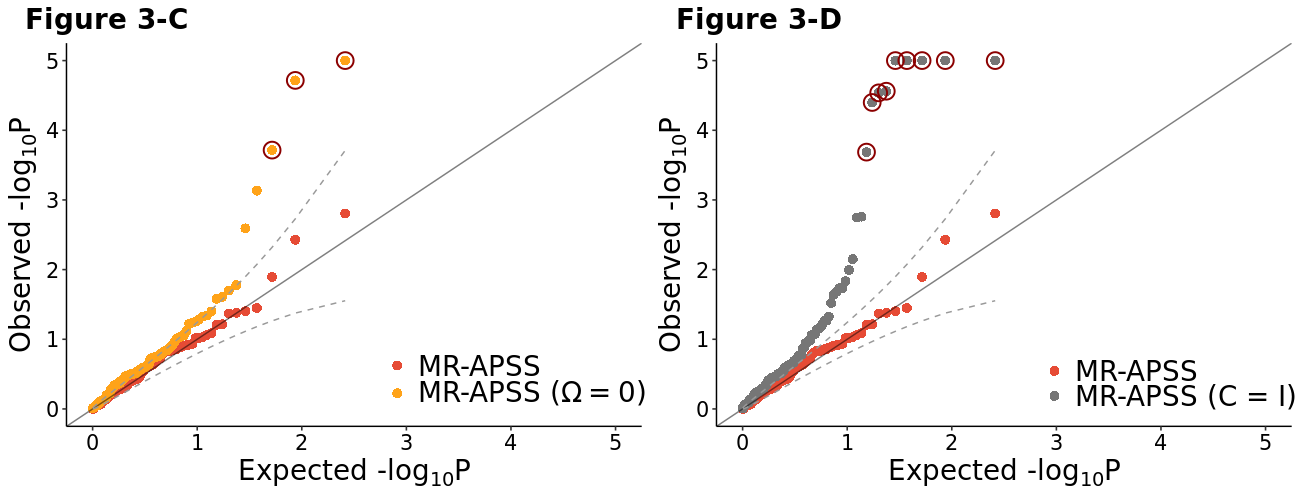

In [71]:
# Figure 3-C 3-D
qq.Omega = qqplot2(dat1 , "MR-APSS", "MR-APSS(Omega=0)", max=5) +
  scale_color_manual(values = c("#E64B35FF", "#FFA319FF"),
                     labels = list("MR-APSS", TeX("MR-APSS ($\\Omega = 0$)"))) +
ggtitle("Figure 3-C")

qq.C =  qqplot2(dat1 , "MR-APSS", "MR-APSS(C=I)", max=5) +
  scale_color_manual(values = c("#E64B35FF", "#767676FF"),
                     labels = list("MR-APSS", "MR-APSS (C = I)")) +
        ggtitle("Figure 3-D")


options(repr.plot.width = 13, repr.plot.height = 5, repr.plot.res = 100)
grid.arrange(qq.Omega, qq.C, layout_matrix = matrix(c(1,2), ncol =2, byrow = T))

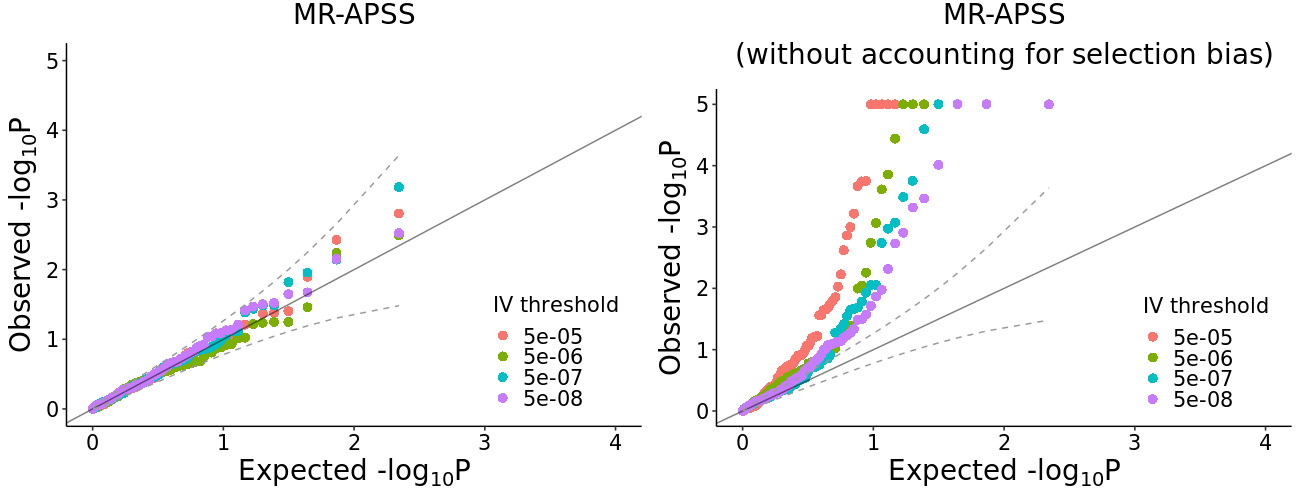

In [72]:
## Type I error control of MR-APSS under different IV selection thresholds
# Figure 5-B 5-C
apss_thresholds_res = subset(apss_res, Method %in% c("MR-APSS", "MR-APSS(Cor.SelectionBia=F)"))
apss_thresholds_res_dcast = na.omit(reshape2::dcast(unique(apss_thresholds_res),
                                                    exposure + outcome ~ Method + Threshold, 
                                                    value.var = "pval", drop = T))

qq.apss = qqplot4(apss_thresholds_res_dcast, "MR-APSS_5e-05", "MR-APSS_5e-06","MR-APSS_5e-07","MR-APSS_5e-08",
                  comp.labels = c("5e-05","5e-06","5e-07","5e-08"), max=5, strong = "MR-APSS_5e-05") +
  xlim(0,4) +
  guides(colour = guide_legend("IV threshold")) +
  ggtitle("MR-APSS") 

qq.apss_selecF = qqplot4(apss_thresholds_res_dcast, "MR-APSS(Cor.SelectionBia=F)_5e-05", "MR-APSS(Cor.SelectionBia=F)_5e-06",
                                          "MR-APSS(Cor.SelectionBia=F)_5e-07","MR-APSS(Cor.SelectionBia=F)_5e-08",
                  comp.labels = c("5e-05","5e-06","5e-07","5e-08"), max=5) +
  xlim(0,4) +
  guides(colour = guide_legend("IV threshold")) +
  ggtitle(expression(atop("MR-APSS", "(without accounting for selection bias)"))) 
 
options(repr.plot.width = 13, repr.plot.height = 5, repr.plot.res = 100)
grid.arrange(qq.apss,qq.apss_selecF, layout_matrix = matrix(c(1,2), ncol =2, byrow = T))